In [18]:
#install packages 
library(tidyverse)
library(lubridate)  
library(ggplot2)
library(RColorBrewer)

In [19]:
data_202106 <- read_csv("202106-divvy-tripdata.csv")
data_202105 <- read_csv("202105-divvy-tripdata.csv")
data_202104 <- read_csv("202104-divvy-tripdata.csv")
data_202103 <- read_csv("202103-divvy-tripdata.csv")
data_202102 <- read_csv("202102-divvy-tripdata.csv")
data_202101 <- read_csv("202101-divvy-tripdata.csv")
data_202012 <- read_csv("202012-divvy-tripdata.csv")
data_202011 <- read_csv("202011-divvy-tripdata.csv")
data_202010 <- read_csv("202010-divvy-tripdata.csv")
data_202009 <- read_csv("202009-divvy-tripdata.csv")
data_202008 <- read_csv("202008-divvy-tripdata.csv")
data_202007 <- read_csv("202007-divvy-tripdata.csv")
data_202006 <- read_csv("202006-divvy-tripdata.csv")
data_202005 <- read_csv("202005-divvy-tripdata.csv")
data_202004 <- read_csv("202004-divvy-tripdata.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),


In [20]:
str(data_202004)
str(data_202005)
str(data_202006)
str(data_202007)
str(data_202008)
str(data_202009)
str(data_202010)
str(data_202011)
str(data_202012)
str(data_202101)
str(data_202102)
str(data_202103)

spec_tbl_df [84,776 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:84776] "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr [1:84776] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:84776], format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ ended_at          : POSIXct[1:84776], format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: chr [1:84776] "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : num [1:84776] 86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr [1:84776] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : num [1:84776] 152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num [1:84776] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng        

In [21]:
data_202004 <- data_202004 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
data_202005 <- data_202005 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
data_202006 <- data_202006 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
data_202007 <- data_202007 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
data_202008 <- data_202008 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
data_202009 <- data_202009 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
data_202010 <- data_202010 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
data_202011 <- data_202011 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))

In [22]:
all_data <- 
  rbind(data_202004,data_202005,data_202006,data_202007,data_202008,data_202009,
        data_202010,data_202011,data_202012,data_202101,data_202102,data_202103)
head(all_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


In [23]:
all_data_v2 <- all_data %>%
  select(-(start_lat:end_lng))
head(all_data_v2)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<fct>,<chr>,<fct>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member


In [24]:
# Remove rows with missing values
colSums(is.na(all_data_v2))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            122175             122801             143242             143703 
     member_casual 
                 0

In [25]:
# 6 rows of data with missing values will be removed
all_data_v3 <- all_data_v2[complete.cases(all_data_v2), ]

colSums(is.na(all_data_v3))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
     member_casual 
                 0

In [26]:
# data with started_at greater than ended_at will be removed
all_data_v3 <- all_data_v3 %>% 
  filter(all_data_v3$started_at < all_data_v3$ended_at)

In [27]:
# create new column `length_of_ride`
all_data_v3$length_of_ride <- all_data_v3$ended_at - all_data_v3$started_at

head(all_data_v3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,length_of_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<fct>,<chr>,<fct>,<chr>,<drtn>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,1609 secs
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,489 secs
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,863 secs
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,732 secs
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual,3175 secs
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,324 secs


In [28]:
# Converting seconds to hours, minutes, seconds format
all_data_v3$length_of_ride <- hms::hms(seconds_to_period(all_data_v3$length_of_ride))

head(all_data_v3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,length_of_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<fct>,<chr>,<fct>,<chr>,<time>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,00:26:49
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,00:08:09
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,00:14:23
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,00:12:12
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual,00:52:55
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,00:05:24


In [29]:
# Adding a column named days_of_week to know the weekly rides
all_data_v3$days_of_week <- wday(all_data_v3$started_at, label = TRUE)

head(all_data_v3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,length_of_ride,days_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<fct>,<chr>,<fct>,<chr>,<time>,<ord>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,00:26:49,Sun
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,00:08:09,Fri
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,00:14:23,Wed
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,00:12:12,Tue
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual,00:52:55,Sat
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,00:05:24,Thu


In [30]:
# Added a column for the year 
all_data_v3$Year <- format(all_data_v3$ended_at, format="%Y")
head(all_data_v3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,length_of_ride,days_of_week,Year
<chr>,<chr>,<dttm>,<dttm>,<chr>,<fct>,<chr>,<fct>,<chr>,<time>,<ord>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,00:26:49,Sun,2020
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,00:08:09,Fri,2020
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,00:14:23,Wed,2020
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,00:12:12,Tue,2020
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual,00:52:55,Sat,2020
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,00:05:24,Thu,2020


In [31]:
# Added a column for the month 
all_data_v3$month <- format(all_data_v3$ended_at, format="%m")
head(all_data_v3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,length_of_ride,days_of_week,Year,month
<chr>,<chr>,<dttm>,<dttm>,<chr>,<fct>,<chr>,<fct>,<chr>,<time>,<ord>,<chr>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,00:26:49,Sun,2020,04
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,00:08:09,Fri,2020,04
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,00:14:23,Wed,2020,04
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,00:12:12,Tue,2020,04
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual,00:52:55,Sat,2020,04
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,00:05:24,Thu,2020,04


## Analyse


In [32]:
# Mean of length of ride
all_data_v3 %>%
    summarize(mean(length_of_ride))

mean(length_of_ride)
<drtn>
1683.111 secs


In [33]:
# Max of length of ride
all_data_v3 %>%
    summarize(max(length_of_ride))

max(length_of_ride)
<drtn>
3523202 secs


In [34]:
# Min of length of ride
all_data_v3 %>%
    summarize(min(length_of_ride))

min(length_of_ride)
<drtn>
1 secs


In [35]:
#  Average length of ride for members and casual riders
all_data_v3 %>% 
    group_by(member_casual) %>%
    summarize(mean(length_of_ride))

member_casual,mean(length_of_ride)
<chr>,<drtn>
casual,2727.3704 secs
member,956.0774 secs


In [36]:
#  Average length of ride for days of the week
all_data_v3 %>% 
    group_by(days_of_week) %>%
    summarize(mean(length_of_ride))

days_of_week,mean(length_of_ride)
<ord>,<drtn>
Sun,2077.153 secs
Mon,1563.291 secs
Tue,1422.918 secs
Wed,1429.512 secs
Thu,1510.411 secs
Fri,1606.617 secs
Sat,1970.430 secs


In [37]:
# number of rides and average duration for users by days of the week and member type
all_data_v3 %>% 
  group_by(member_casual, days_of_week) %>% 
  summarize(number_of_rides=n(), average_duration = mean(length_of_ride))

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,days_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<drtn>
casual,Sun,249743,3068.3262 secs
casual,Mon,142029,2729.4779 secs
casual,Tue,136209,2455.7890 secs
casual,Wed,148340,2453.1876 secs
casual,Thu,156160,2615.9879 secs
casual,Fri,196429,2595.6053 secs
casual,Sat,318998,2838.6234 secs
member,Sun,250441,1088.7415 secs
member,Mon,251883,905.7149 secs


## Share

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



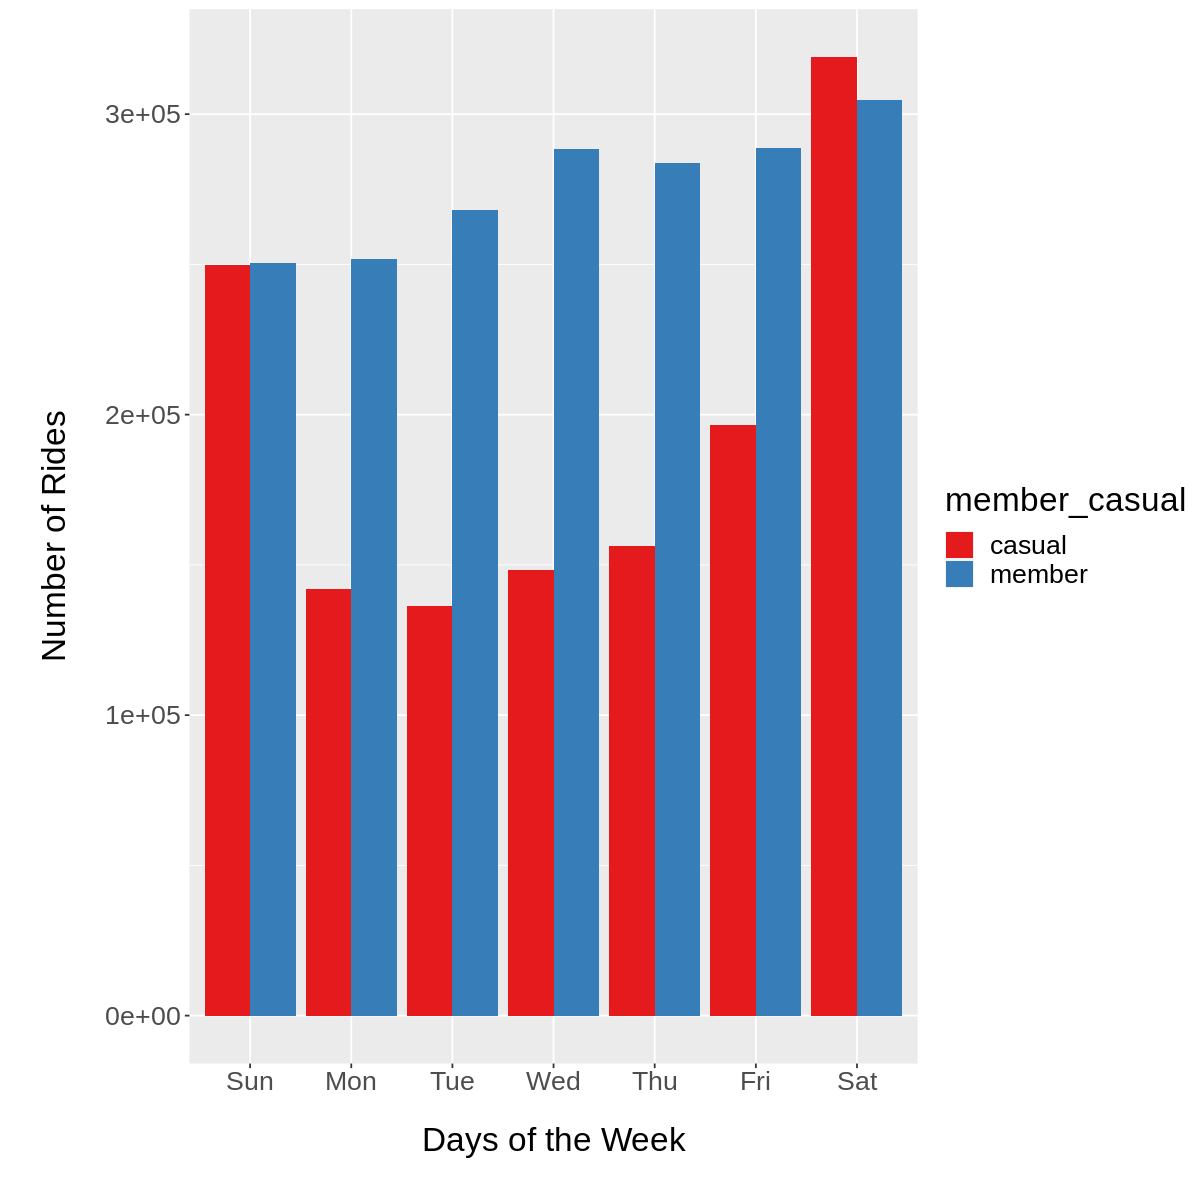

In [51]:
all_data_v3 %>% 
  group_by(member_casual, days_of_week) %>% 
  summarize(number_of_rides=n()) %>%
  arrange(member_casual, days_of_week)  %>% 
  ggplot(aes(x = days_of_week, y = number_of_rides,fill = member_casual)) + 
  geom_col(position = "dodge")+ 
  theme(text = element_text(size=20),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
        axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
        ) + 
  scale_fill_brewer(palette = "Set1") +
  labs(x="Days of the Week",y="Number of Rides")
  options(repr.plot.width = 10, repr.plot.height = 10)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



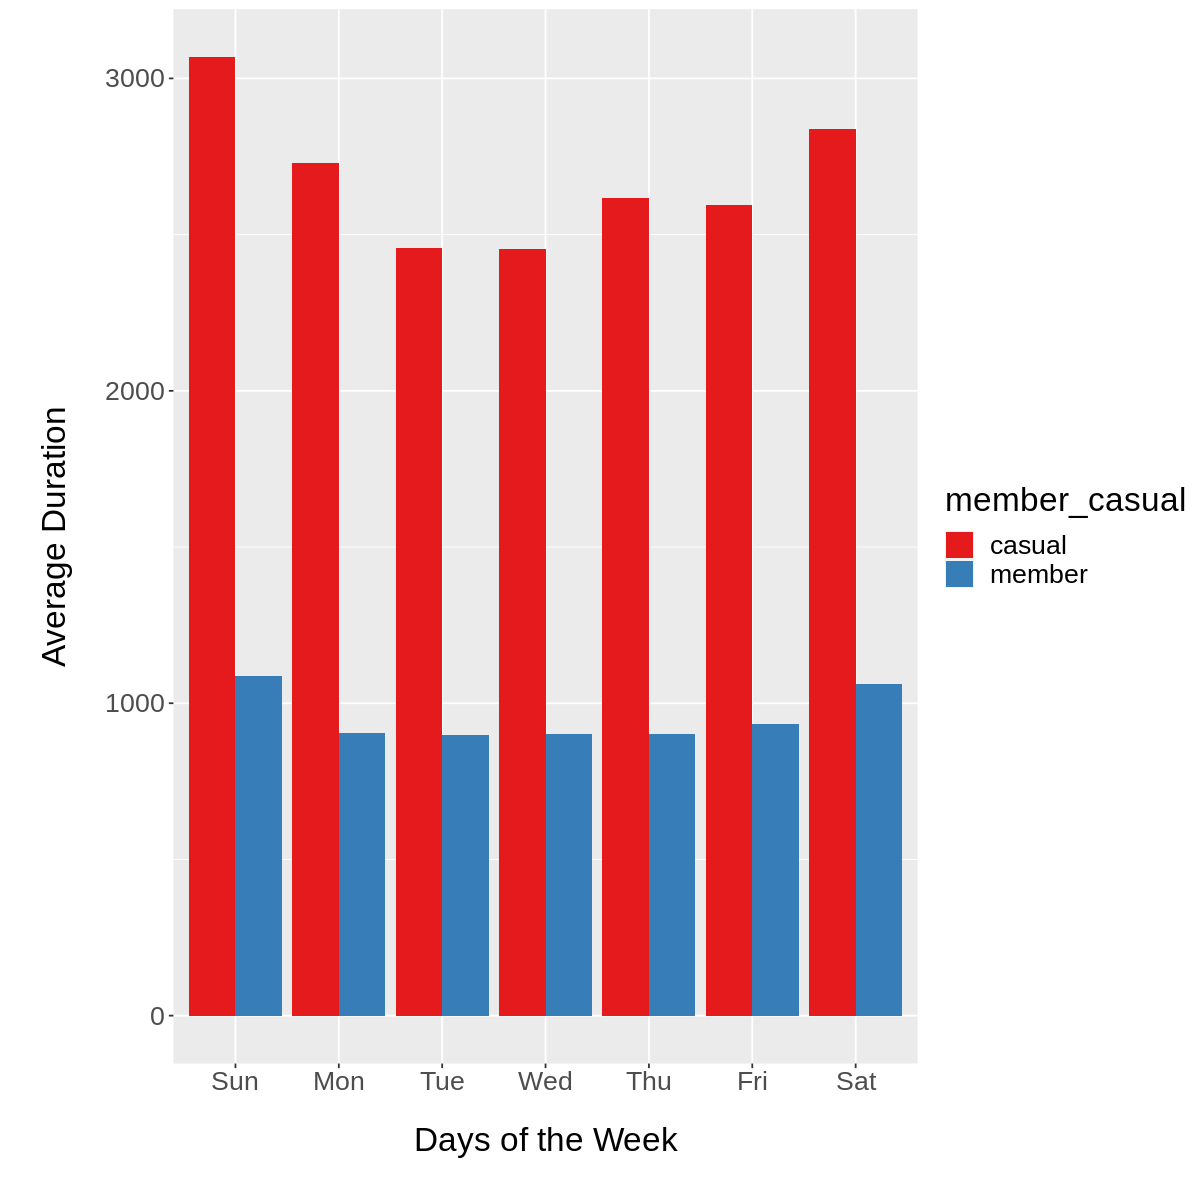

In [48]:
all_data_v3 %>% 
  group_by(member_casual, days_of_week) %>% 
  summarize(average_duration = mean(length_of_ride)) %>%
  arrange(member_casual, days_of_week)  %>% 
  ggplot(aes(x = days_of_week, y = average_duration, color = ,fill = member_casual)) + 
  geom_col(position = "dodge") + 
  theme(text = element_text(size=20),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
        axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
        ) + 
  scale_fill_brewer(palette = "Set1") +
  labs(x="Days of the Week",y="Average Duration")
  options(repr.plot.width = 10, repr.plot.height = 10)


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



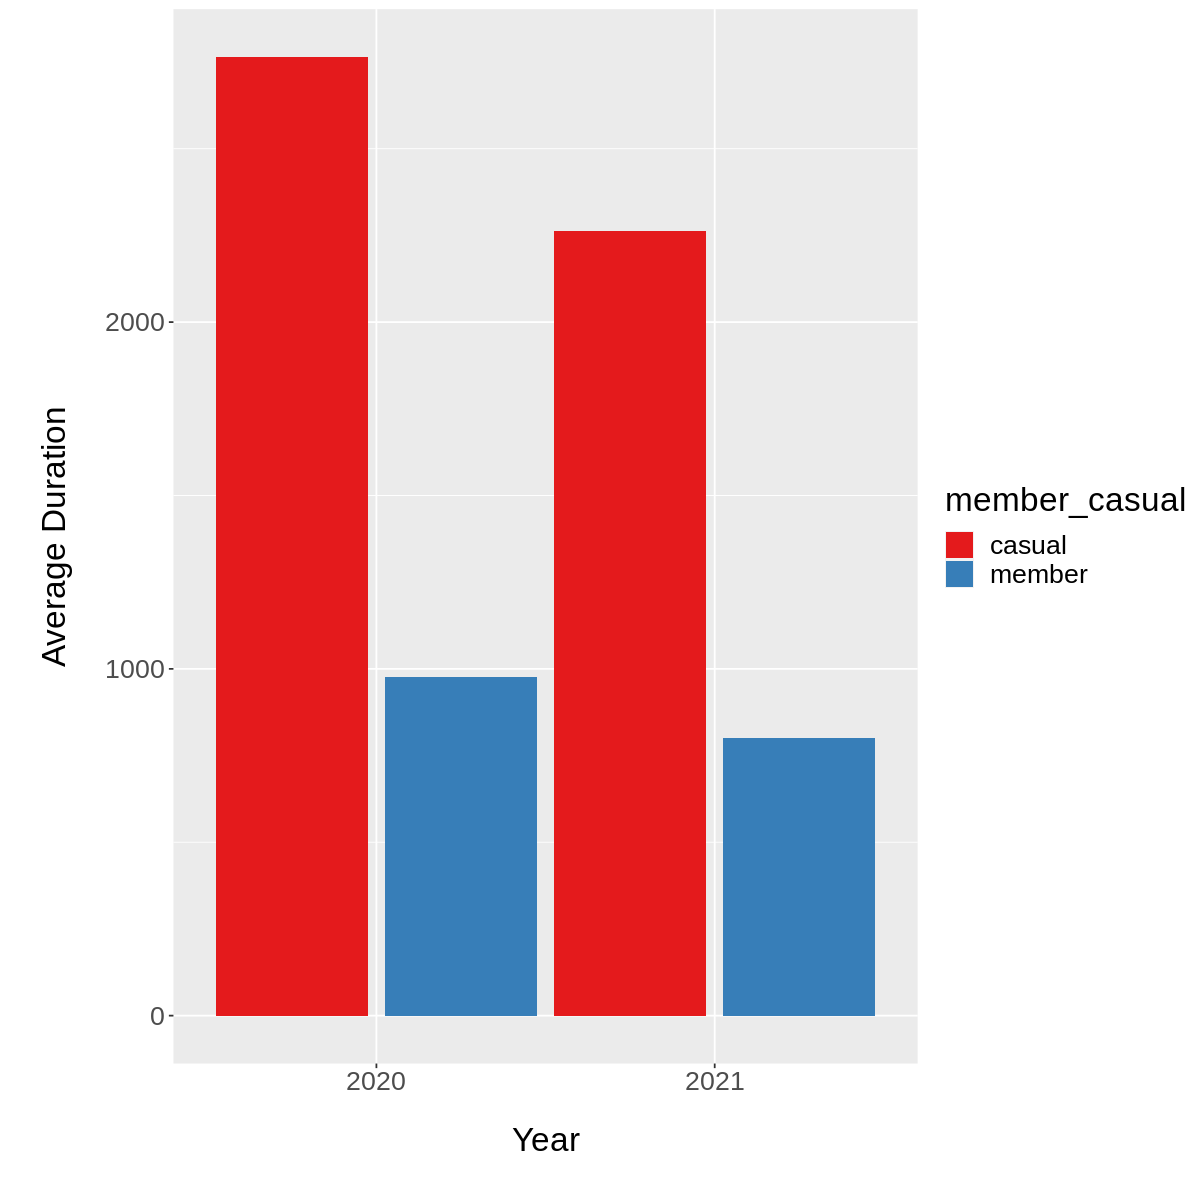

In [40]:
all_data_v3 %>% 
  group_by(member_casual, Year) %>% 
  summarize(average_duration = mean(length_of_ride)) %>%
  arrange(member_casual, Year) %>%
  ggplot(aes(x = Year, y = average_duration,fill = member_casual)) + 
  geom_col(position = position_dodge(1)) +
  theme(text = element_text(size=20),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
        axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
        ) + 
  scale_fill_brewer(palette = "Set1") +
  labs(y="Average Duration",x="Year")
  options(repr.plot.width = 8, repr.plot.height = 8)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



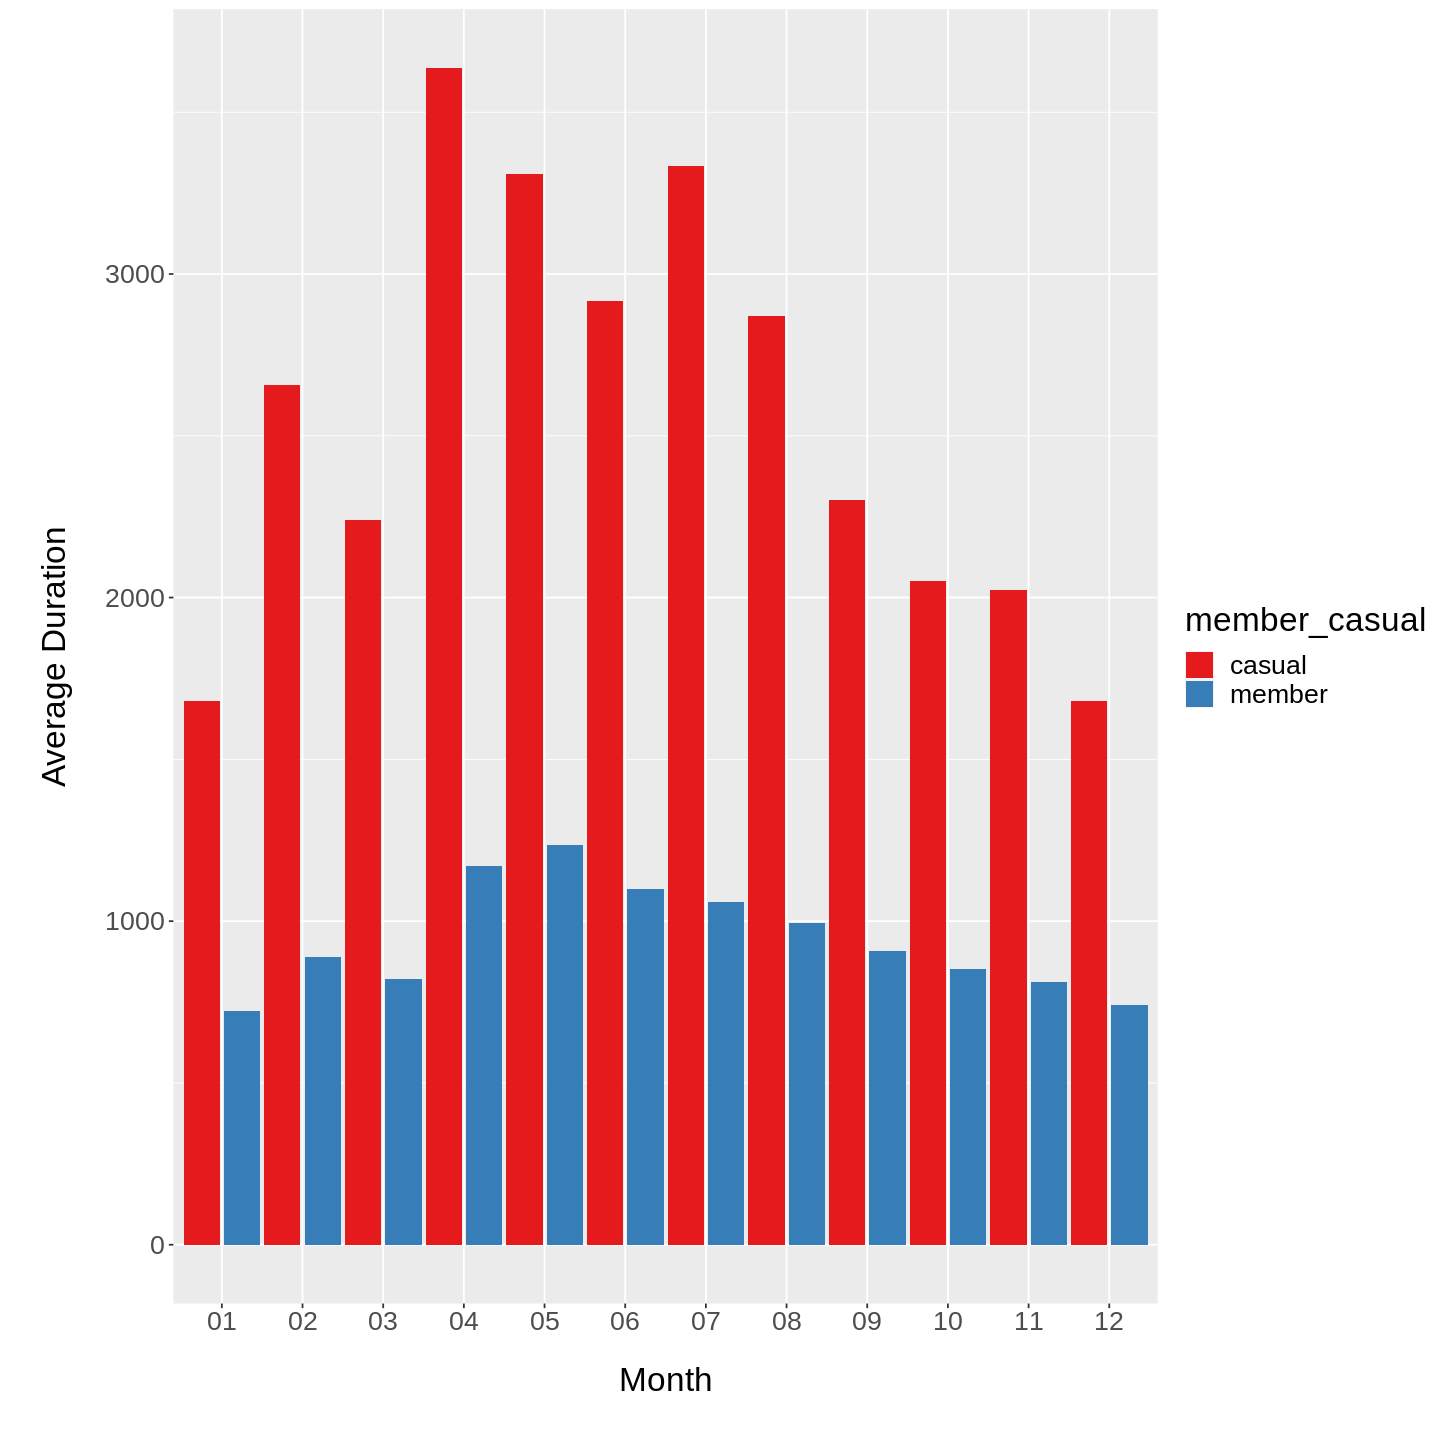

In [53]:
all_data_v3 %>% 
  group_by(member_casual, month) %>% 
  summarize(average_duration = mean(length_of_ride)) %>%
  arrange(member_casual, month) %>%
  ggplot(aes(x = month, y = average_duration,fill = member_casual)) + 
  geom_col(position = position_dodge(1)) +
    theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  scale_fill_brewer(palette = "Set1") +          
  labs(y="Average Duration",x="Month")
  options(repr.plot.width = 12, repr.plot.height = 12)

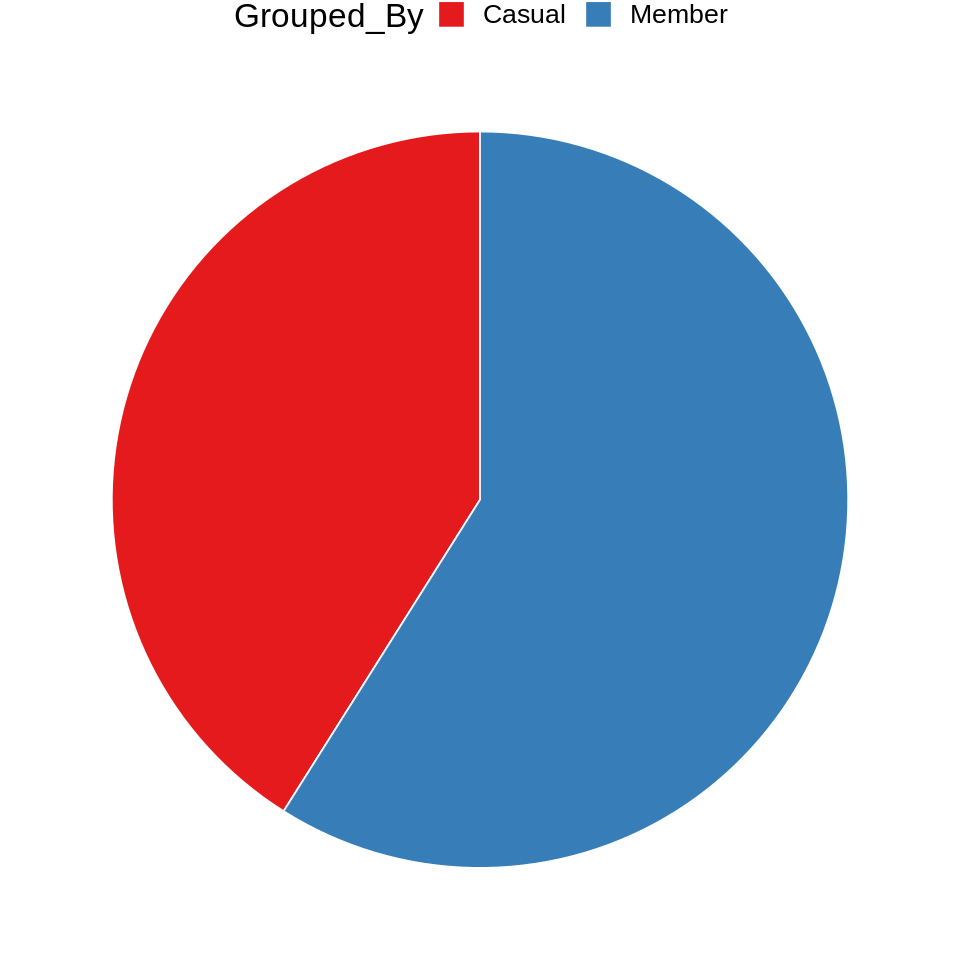

In [156]:
members_by_type <- all_data_v3 %>% 
    group_by(member_casual) %>% 
  summarize(n())

casual <- members_by_type[1,2]
member <- members_by_type[2,2]

total <- casual + member
data <- c(casual/total *100, member/total *100)
Grouped_By <- c("Casual", "Member")
ggplot(members_by_type,aes(x="", y=data, fill=Grouped_By)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  
  theme_void() + 
  theme(text = element_text(size=20)) + 
  theme(legend.position = "top") +
  scale_fill_brewer(palette="Set1")
options(repr.plot.width = 8, repr.plot.height = 8)

In [158]:
# Experimental

# all_data_v3 %>% 
#   group_by(member_casual, month) %>% 
#   summarize(average_duration = mean(length_of_ride)) %>%
#   arrange(member_casual, month) %>%
#   filter(member_casual == "casual") %>%
#   ggplot(aes(x = month, y = average_duration)) + 
#   geom_line() + geom_point() +
#   theme(text = element_text(size=20),
#         axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
#         axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
#         ) + 
#   labs(y="Average Duration",x="month")
#   options(repr.plot.width = 8, repr.plot.height = 8)

In [43]:
# average ride_length by type and day of week
tot <- aggregate(all_data_v3$length_of_ride ~ all_data_v3$member_casual +
                      all_data_v3$days_of_week, FUN = mean)

head(tot)
write.csv(tot, file = 'avg_length_of_ride.csv')

,all_data_v3$member_casual,all_data_v3$days_of_week,all_data_v3$length_of_ride
,<chr>,<ord>,<drtn>
1,casual,Sun,3068.3262 secs
2,member,Sun,1088.7415 secs
3,casual,Mon,2729.4779 secs
4,member,Mon,905.7149 secs
5,casual,Tue,2455.7890 secs
6,member,Tue,898.3547 secs


In [44]:
# average length_of_ride and type and month
tot2 <- aggregate(all_data_v3$length_of_ride ~ all_data_v3$member_casual + all_data_v3$days_of_week, FUN = length)

head(tot2)
write.csv(tot2, file = 'num_of_rides_by_day.csv')

,all_data_v3$member_casual,all_data_v3$days_of_week,all_data_v3$length_of_ride
,<chr>,<ord>,<int>
1,casual,Sun,249743
2,member,Sun,250441
3,casual,Mon,142029
4,member,Mon,251883
5,casual,Tue,136209
6,member,Tue,268197


In [45]:
tot3 <- aggregate(all_data_v3$ride_id ~ all_data_v3$member_casual + all_data_v3$month, FUN = length)

head(tot3)
write.csv(tot3, file = 'num_of_rides_by_month.csv')

,all_data_v3$member_casual,all_data_v3$month,all_data_v3$ride_id
,<chr>,<chr>,<int>
1,casual,01,14698
2,member,01,68822
3,casual,02,8608
4,member,02,34381
5,casual,03,75632
6,member,03,130037


## Act

### Key Findings:
- Our casual customers take the most rides of the weekends. Conversely, our members customers take the most rides during the week.
- On average, our members take shorter rides than our casual customers.
- Company sees more customers in the months of July, August and September while less customers in December, February, January.

### Recommendations
- Advertise how a membership can save money for those customers who take longer rides.
- Target casual customers who rent a bike for leisure on their weekends.
- Introduce referral system where existing members can refer their friends to buy membership in discounted prices preferrably on weekends.
- Create a large summer campaign when more people are likely to rent a bike.